In [1]:
import sys
import os

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

import numpy as np
import matplotlib.pyplot as plt

from mesh import *
from geometry import *
import material
import cross_section
import beam_element
import structure
import solver

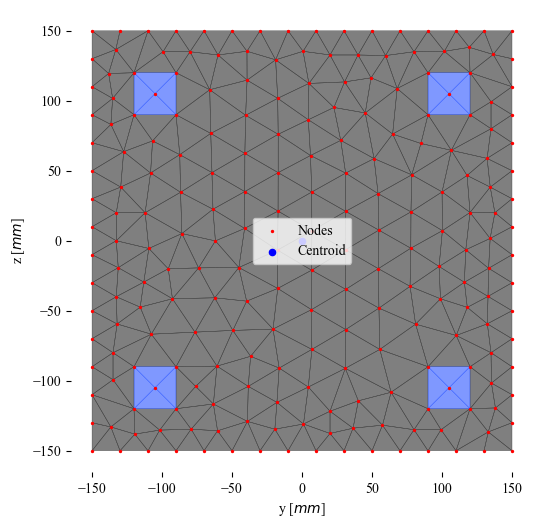

╒════════════════════╤══════════╕
│ Mesh Type          │ triangle │
├────────────────────┼──────────┤
│ Number of elements │ 382      │
├────────────────────┼──────────┤
│ Number of nodes    │ 222      │
├────────────────────┼──────────┤
│ Cross Section Area │ 90000.00 │
╘════════════════════╧══════════╛
╒═══════════════════╤══════════════╤══════════════╕
│                   │            y │            z │
╞═══════════════════╪══════════════╪══════════════╡
│ Centroid          │        -0.00 │        -0.00 │
├───────────────────┼──────────────┼──────────────┤
│ Moment of inertia │ 675000000.00 │ 675000000.00 │
╘═══════════════════╧══════════════╧══════════════╛


In [2]:
ReinforcedConcrete = Simple_RC_Column(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 30)
mesh = Mesh(ReinforcedConcrete, "triangle", 20)
mesh.plot()
mesh.print()

In [3]:
struc = structure.Cantilever(beam   = mesh, 
						   	 length = 2000,
						   	 load_DOFs = [8],
						   	 nodal_loads = [1],
						   	 number_of_sections_per_elemnt = 10)

In [4]:
non_linear_solver = solver.Nonlinear(struc, 
									 constraint="Load",
									 section_max_iter = 500)

In [5]:
#increments = np.zeros(200)
#increments.fill(0.5)
increments = [5000, 45000, 30000, 10000, 5000 ,5000, 5000]

u_history , lambda_history  = non_linear_solver.solve(increments)

  0%|          | 0/7 [00:00<?, ?it/s]

----------------------------------------------
Load step 1 of 7
   Attempt  1
      NR Iteration  0
      llambda 5000.0
         Beam Element  1
            Element iteration  0
      u       0.8456634229459616
      Residuals Norm  3.725290742795043e-09
NR Converged!
----------------------------------------------
Load step 2 of 7
   Attempt  1
      NR Iteration  0
      llambda 45000.0
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
            Element iteration  3
      u       8.456634229459617
      Residuals Norm  3728697.6037375988
      NR Iteration  1
      llambda -0.0
         Beam Element  1
            Element iteration  0
            Element iteration  1
            Element iteration  2
            Element iteration  3
      u       12.158013264734677
      Residuals Norm  1747302.8035959583
      NR Iteration  2
      llambda -0.0
         Beam Element  1
            Element iteration  0
       

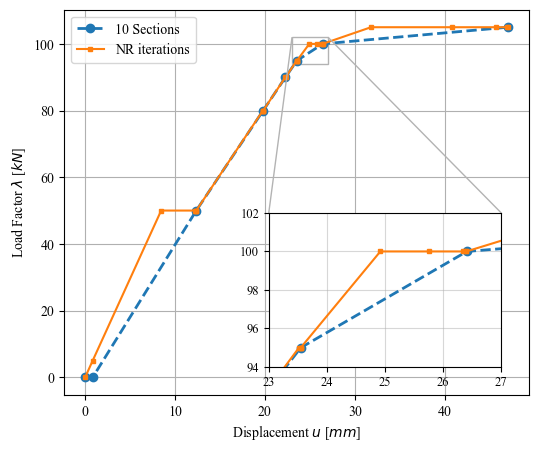

In [15]:
u = [         0, 0.84,  8.45, 12.16, 12.33, 12.35, 12.35, 19.76, 19.79, 19.79, 19.79, 22.26, 22.29, 23.52, 23.55, 23.55, 23.55,  24.92,  25.76,  26.35,  26.40,  26.40,  31.78,  40.75,  45.70,  46.94,  47.00]
l = np.array([0, 5000, 50000, 50000, 50000, 50000, 50000, 80000, 80000, 80000, 80000, 90000, 90000, 95000, 95000, 95000, 95000, 100000, 100000, 100000, 100000, 100000, 105000, 105000, 105000, 105000, 105000])
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main figure and axes
fig, ax = plt.subplots(figsize=(6, 5))
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 100

ax.plot(u_history[:,6+2], lambda_history/1000, label="10 Sections", marker="o", lw=2, ls="dashed")
ax.plot(u, l/1000, label="NR iterations", marker="s", markersize=3)
ax.set_xlabel("Displacement $u$ [$mm$]")
ax.set_ylabel("Load Factor $\\lambda$ [$kN$]")
ax.legend(loc="upper left")
ax.grid()

# Inset plot
axins = inset_axes(ax, width="50%", height="40%", loc='lower right', borderpad=2)
axins.plot(u_history[:,6+2], lambda_history/1000, label="10 Sections", marker="o", lw=2, ls="dashed")
axins.plot(u, l/1000, label="NR iterations", marker="s", markersize=3)
axins.set_xlim(23, 27) 
axins.set_ylim(94, 102)
axins.tick_params(axis='both', which='both', labelsize=9)
axins.grid(alpha=0.5)

# Draw a box and lines to show zoom area
mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.7")

plt.show()